In [1]:
import pandas as pd
import numpy as np

数据读取

In [5]:
# 主表，因变量，房价指数
df_hpi = pd.read_csv(r"C:\Users\news1\python1902\house_price_pridict_data\monthly-hpi.csv")
# 自变量，失业率
df_upl = pd.read_csv(r"C:\Users\news1\python1902\house_price_pridict_data\unemployment-macro.csv")
# 自变量，联邦利率
df_ffr = pd.read_csv(r"C:\Users\news1\python1902\house_price_pridict_data\fed_funds.csv")
# 自变量，cpi指数，长期利率，sp500指数
df_cpi = pd.read_csv(r"C:\Users\news1\python1902\house_price_pridict_data\shiller.csv")
# 自变量， gdp
df_gdp = pd.read_csv(r"C:\Users\news1\python1902\house_price_pridict_data\gdp.csv")

In [13]:
# df_data = df_cpi.merge(df_upl, on='date')
# df_data = df_cpi.merge(df_gdp, on='date')
# df_data = df_cpi.merge(df_ffr, on='date')
# df_data = df_cpi.merge(df_hpi, on='date')

df_data = df_cpi.merge(df_upl, on='date')\
                    .merge(df_gdp, on='date')\
                    .merge(df_ffr, on='date')\
                    .merge(df_hpi, on='date')

In [14]:
# 查看数据结构
df_data.head()

,date,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,2011-01-01,1282.62,220.22,3.39,16.2,8393,2800,6816,6.5,60.1,5766.7,64.2,192.7,14881.3,0.17,181.35
1,2011-04-01,1331.51,224.91,3.46,16.1,8016,2466,6823,6.8,59.4,5870.8,64.2,203.1,14989.6,0.10,180.80
2,2011-07-01,1325.19,225.92,3.00,15.9,8177,2785,6850,6.8,59.2,5802.6,64.0,204.6,15021.1,0.07,184.25
3,2011-10-01,1207.22,226.42,2.15,15.8,7802,2555,6917,8.0,57.9,5812.9,64.1,201.1,15190.3,0.07,181.51
4,2012-01-01,1300.58,226.66,1.97,15.2,7433,2809,7022,7.4,57.1,5765.7,63.7,200.7,15291.0,0.08,179.13


In [15]:
df_data.shape

(23, 16)

数据清洗

In [16]:
# 查看重复值
df_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

In [17]:
# 查看缺失值
df_data.isnull()

,date,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# 查看有无异常值
df_data.describe()

,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
count,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1697.955652,232.821739,2.26913,13.004348,5602.521739,2317.173913,7088.217391,8.495652,52.917391,5914.082609,63.265217,198.421739,15795.756522,0.145217,204.955652
std,322.596751,5.405947,0.54516,2.267052,1801.301143,294.338187,248.798742,1.316496,4.059854,176.572817,0.561337,7.786875,571.226411,0.093121,19.364036
min,1207.220000,220.220000,1.50000,9.700000,3175.000000,1715.000000,6816.000000,6.500000,47.600000,5745.400000,62.500000,182.600000,14881.300000,0.070000,179.130000
25%,1373.105000,229.595000,1.89500,11.050000,3912.000000,2137.500000,6895.500000,7.500000,49.200000,5773.600000,62.800000,192.350000,15371.600000,0.090000,187.840000
50%,1720.030000,233.600000,2.09000,13.600000,5807.000000,2347.000000,7007.000000,8.200000,53.600000,5841.400000,62.900000,202.500000,15747.000000,0.120000,205.440000
75%,1998.955000,237.250000,2.60000,14.700000,7027.500000,2497.500000,7308.000000,9.700000,55.500000,5970.850000,63.700000,203.600000,16321.600000,0.155000,218.645000
max,2148.900000,240.650000,3.46000,16.200000,8393.000000,2809.000000,7577.000000,10.900000,60.100000,6307.500000,64.200000,208.300000,16727.000000,0.390000,241.590000


预分析（特征选择）

方法一：调用seaborn包，做散点图，分析相关性

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


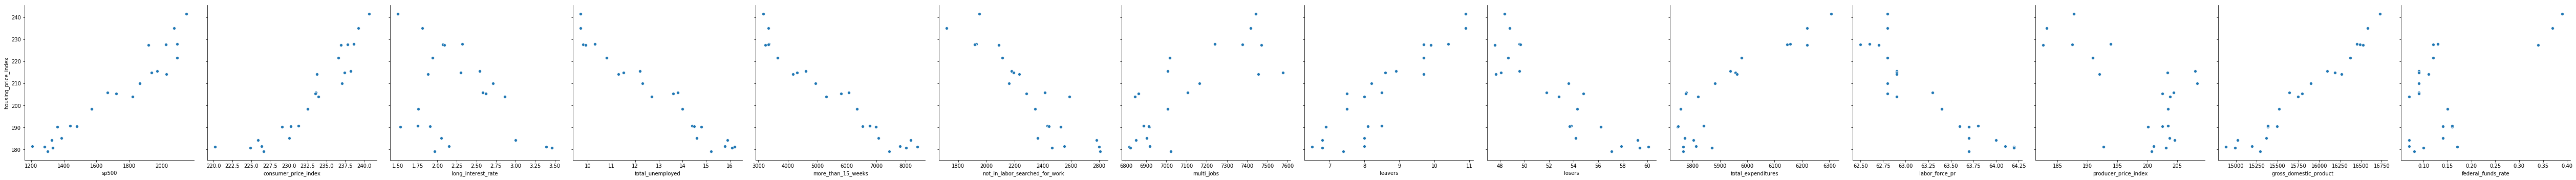

In [105]:
sns.pairplot(df_data, x_vars=['sp500','consumer_price_index','long_interest_rate',\
                             'total_unemployed','more_than_15_weeks','not_in_labor_searched_for_work',\
                             'multi_jobs','leavers','losers',\
                             'total_expenditures','labor_force_pr','producer_price_index',\
                             'gross_domestic_product','federal_funds_rate'], y_vars='housing_price_index', size=5,aspect=1)
plt.show()

方法二
pandas中带有相关系数函数pandas.corr()，pandas.DataFrame.corr(),要求数据的type是DataFrame,return的结果也是DataFame格式。pandas.corr()返回的是相关系数矩阵，列与列的两两相关

In [106]:
type(df_data)


pandas.core.frame.DataFrame

In [107]:
corr_matrix=df_data.corr()
corr_matrix

,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
sp500,1.000000,0.923372,-0.268089,-0.959047,-0.971915,-0.856560,0.742614,0.855760,-0.913242,0.781037,-0.941233,-0.496051,0.959274,0.372566,0.960468
consumer_price_index,0.923372,1.000000,-0.434417,-0.921749,-0.939406,-0.883247,0.714263,0.841448,-0.909034,0.722605,-0.926848,-0.335281,0.933372,0.384849,0.923467
long_interest_rate,-0.268089,-0.434417,1.000000,0.410265,0.403301,0.403981,-0.411748,-0.509524,0.494381,-0.298756,0.295334,0.344231,-0.451033,-0.441148,-0.353817
total_unemployed,-0.959047,-0.921749,0.410265,1.000000,0.994147,0.896420,-0.825065,-0.917441,0.929736,-0.872403,0.925589,0.641777,-0.991416,-0.517291,-0.975517
more_than_15_weeks,-0.971915,-0.939406,0.403301,0.994147,1.000000,0.893572,-0.803648,-0.905185,0.944514,-0.836933,0.944752,0.586836,-0.993347,-0.464792,-0.972029
not_in_labor_searched_for_work,-0.856560,-0.883247,0.403981,0.896420,0.893572,1.000000,-0.727847,-0.874050,0.821083,-0.825992,0.805012,0.550419,-0.899720,-0.534462,-0.903926
multi_jobs,0.742614,0.714263,-0.411748,-0.825065,-0.803648,-0.727847,1.000000,0.773518,-0.809372,0.784621,-0.691852,-0.595127,0.823856,0.497295,0.789606
leavers,0.855760,0.841448,-0.509524,-0.917441,-0.905185,-0.874050,0.773518,1.000000,-0.886491,0.885333,-0.761688,-0.670143,0.924650,0.589725,0.903842
losers,-0.913242,-0.909034,0.494381,0.929736,0.944514,0.821083,-0.809372,-0.886491,1.000000,-0.726257,0.869899,0.488644,-0.940262,-0.414208,-0.892854
total_expenditures,0.781037,0.722605,-0.298756,-0.872403,-0.836933,-0.825992,0.784621,0.885333,-0.726257,1.000000,-0.670171,-0.775035,0.858887,0.699799,0.878971


In [108]:
# 查看因变量与自变量之间的相关性，筛选变量
corr_matrix["housing_price_index"]

sp500                             0.960468
consumer_price_index              0.923467
long_interest_rate               -0.353817
total_unemployed                 -0.975517
more_than_15_weeks               -0.972029
not_in_labor_searched_for_work   -0.903926
multi_jobs                        0.789606
leavers                           0.903842
losers                           -0.892854
total_expenditures                0.878971
labor_force_pr                   -0.904213
producer_price_index             -0.621928
gross_domestic_product            0.976960
federal_funds_rate                0.561913
housing_price_index               1.000000
Name: housing_price_index, dtype: float64

构建训练集与测试集

重新定义自变量和因变量

In [109]:
X = df_data[['sp500','consumer_price_index','total_unemployed','total_expenditures','labor_force_pr','producer_price_index','gross_domestic_product','federal_funds_rate']]
X.head()  #查看数据
# x.shape   #查看数据结构

,sp500,consumer_price_index,total_unemployed,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate
0,1282.62,220.22,16.2,5766.7,64.2,192.7,14881.3,0.17
1,1331.51,224.91,16.1,5870.8,64.2,203.1,14989.6,0.10
2,1325.19,225.92,15.9,5802.6,64.0,204.6,15021.1,0.07
3,1207.22,226.42,15.8,5812.9,64.1,201.1,15190.3,0.07
4,1300.58,226.66,15.2,5765.7,63.7,200.7,15291.0,0.08


In [110]:
y = df_data[["housing_price_index"]]
y.head()
# y.shape


,housing_price_index
0,181.35
1,180.80
2,184.25
3,181.51
4,179.13


构建训练集与测试级

In [111]:
from sklearn.cross_validation import train_test_split

In [112]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(17, 8)
(17, 1)
(6, 8)
(6, 1)


数据归一化各个特征之间的数据差异还是比较大的，消除量纲和离群值的影响

In [114]:
from sklearn.preprocessing import StandardScaler
# 调用StandardScaler 类进行归一化处理

In [115]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

训练模型
通过调用sklearn建立模型

In [116]:
from sklearn import linear_model

In [117]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(model)
print(model.intercept_)  #截距
print(model.coef_)  #系数

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[4.68404883e-15]
[[ 0.95895229  0.80800518  0.8844055  -0.01311927  0.17817073 -0.45800335
   0.12294737 -0.04988814]]


In [118]:
features = ['sp500','consumer_price_index','total_unemployed','total_expenditures','labor_force_pr','producer_price_index','gross_domestic_product','federal_funds_rate']
para = model.coef_.tolist()
for each in zip(features,para[0]):
    print(each)

('sp500', 0.9589522893299809)
('consumer_price_index', 0.8080051751173265)
('total_unemployed', 0.8844055014581382)
('total_expenditures', -0.013119270740141112)
('labor_force_pr', 0.17817073283348955)
('producer_price_index', -0.458003353063288)
('gross_domestic_product', 0.12294736674296446)
('federal_funds_rate', -0.04988813987938368)


回归方程：y = 4.68 + 0.95sp500 + 0.808consumer_price_index + 0.884total_unemployed - 0.013total_expenditures + 0.178labor_force_pr - 0.458producer_price_index + 0.123gross_domestic_product - 0.049federal_funds_rate

结果预测

In [151]:
# 使用测试集评价模型
# 打印预测结果
y_pred = model.predict(X_test)
print(y_pred)

[[ 1.11608178]
 [ 1.56608251]
 [-1.11679755]
 [ 0.2285434 ]
 [ 1.24914641]
 [ 1.0839498 ]]


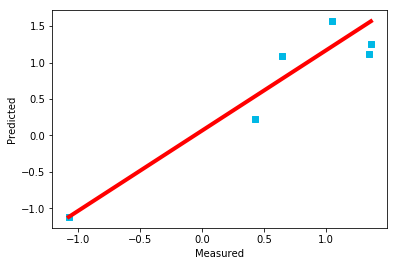

In [120]:
# 做回归散点图
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='s', color='#00b8e5')
ax.plot([y_test.min(), y_test.max()],[y_pred.min(), y_pred.max()],color='red',linestyle='-',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

检验

In [121]:
from sklearn import metrics
# 计算MAE
MAE=metrics.mean_absolute_error(y_test,y_pred)
#计算MSE
MSE=metrics.mean_squared_error(y_test,y_pred)
# 计算RMSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 0.2578826388590358
MSE: 0.09480769742847973
RMSE: 0.307908586155826


MAE :Mean Absolute Error ,平均绝对误差是绝对误差的平均值 ,平均绝对误差能更好地反映预测值误差的实际情况。

MSE: Mean Squared Error ,均方误差是指参数估计值与参数真值之差平方的期望值; MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度。

RMSE :均方根误差是均方误差的算术平方根，RMSE值越接近1表明模型拟合度越好。

R方

In [160]:
y_pred1 = y_pred.tolist()
# print(y_pred1)
y_pred1 = np.array(y_pred1)
# print(y_pred1)
y_pred1.shape
for i, y_pred1 in enumerate(y_pred1):
    print('Predicted:%s, Target:%s' % (y_pred1, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted:[1.11608178], Target:[1.34917105]
Predicted:[1.56608251], Target:[1.04666856]
Predicted:[-1.11679755], Target:[-1.07190293]
Predicted:[0.2285434], Target:[0.42954238]
Predicted:[1.24914641], Target:[1.36287326]
Predicted:[1.0839498], Target:[0.64877764]
R-squared: 0.86


ROC曲线

In [123]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (1,) and (6, 1)

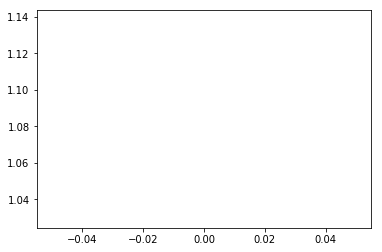

In [161]:
#再看一下ROC曲线
plt.figure()
plt.plot(range(len(y_pred1)),y_pred1,'b',label="predict")
plt.plot(range(len(y_pred1)),y_test,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("number of hpi")
plt.ylabel('value of hpi')
plt.show()

调整

In [154]:
import sklearn 
from sklearn.cross_validation import train_test_split
#重新定义X，y
X2 = df_data[['sp500','consumer_price_index','total_unemployed','total_expenditures','labor_force_pr','gross_domestic_product']]
y2 = df_data[["housing_price_index"]]
#print(X2,y2)
#构建测试集与训练集
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2, y2, random_state=1)
#数据归一化
from sklearn.preprocessing import StandardScaler
X_scaler2 = StandardScaler()
y_scaler2 = StandardScaler()
X_train2 = X_scaler2.fit_transform(X_train2)
y_train2 = y_scaler2.fit_transform(y_train2)
X_test2 = X_scaler2.transform(X_test2)
y_test2 = y_scaler2.transform(y_test2)
#print(X_train2,y_train2)
#构建线性拟合模型
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model2 = linear_model.LinearRegression()
model2.fit(X_train2,y_train2)
print(model2)
print(model2.intercept_)
print(model2.coef_)
#结果预测
y_pred2 = model2.predict(X_test2)

from sklearn import metrics
# 计算MAE
MAE2=metrics.mean_absolute_error(y_test2,y_pred2)
#计算MSE
MSE2=metrics.mean_squared_error(y_test2,y_pred2)
# 计算RMSE
RMSE2=np.sqrt(metrics.mean_squared_error(y_test2,y_pred2))
print("MAE2:",MAE2)
print("MSE2:",MSE2)
print("RMSE2:",RMSE2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[2.28995322e-15]
[[ 0.6297255  -0.06635981  0.13269135  0.06109493  0.19806611  0.69127098]]
MAE2: 0.20182933378412793
MSE2: 0.08669811637277712
RMSE2: 0.2944454387026179


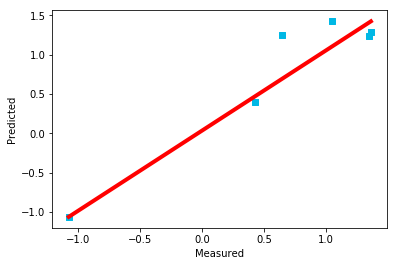

In [155]:
#看一下回归曲线
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
ax.scatter(y_test2, y_pred2,marker='s',color='#00b8e5')
ax.plot([y_test2.min(), y_test2.max()],[y_pred2.min(), y_pred2.max()],color='red',linestyle='-',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [156]:
#看一下R方
y_pred22 = y_pred2.tolist()
#print(y_pred1)
y_pred22 = np.array(y_pred22)
#print(y_pred1)
#y_pred1.shape
for i, y_pred22 in enumerate(y_pred22):
    print('Predicted: %s, Target: %s' % (y_pred22, y_test2[i]))
print('R-squared: %.2f' % model2.score(X_test2, y_test2))

Predicted: [1.23198548], Target: [1.34917105]
Predicted: [1.42194729], Target: [1.04666856]
Predicted: [-1.06151731], Target: [-1.07190293]
Predicted: [0.39305275], Target: [0.42954238]
Predicted: [1.29033722], Target: [1.36287326]
Predicted: [1.24787804], Target: [0.64877764]
R-squared: 0.88


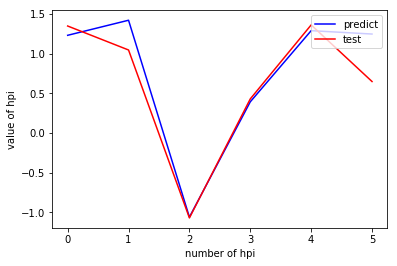

In [157]:
#再看一下ROC曲线
plt.figure()
plt.plot(range(len(y_pred2)),y_pred2,'b',label="predict")
plt.plot(range(len(y_pred2)),y_test2,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("number of hpi")
plt.ylabel('value of hpi')
plt.show()

调整2

结合调整1的结果，将与因变量相关性较低的'total_expenditures','labor_force_pr'2个变量剔除，保留4个变量，再次训练模型，观察变化

In [162]:
import sklearn 
from sklearn.cross_validation import train_test_split
#重新定义X，y
X3 = df_data[['sp500','consumer_price_index','total_unemployed','gross_domestic_product']]
y3 = df_data[["housing_price_index"]]
#print(X3,y3)
#构建测试集与训练集
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3, y3, random_state=1)
#数据归一化
from sklearn.preprocessing import StandardScaler
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train3 = X_scaler3.fit_transform(X_train3)
y_train3 = y_scaler3.fit_transform(y_train3)
X_test3 = X_scaler3.transform(X_test3)
y_test3 = y_scaler3.transform(y_test3)
#print(X_train3,y_train3)
#构建线性拟合模型
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model3 = linear_model.LinearRegression()
model3.fit(X_train3,y_train3)
print(model3)
print(model3.intercept_)
print(model3.coef_)
#结果预测
y_pred3 = model3.predict(X_test3)

from sklearn import metrics
# 计算MAE
MAE3=metrics.mean_absolute_error(y_test3,y_pred3)
#计算MSE
MSE3=metrics.mean_squared_error(y_test3,y_pred3)
# 计算RMSE
RMSE3=np.sqrt(metrics.mean_squared_error(y_test3,y_pred3))
print("MAE3:",MAE3)
print("MSE3:",MSE3)
print("RMSE3:",RMSE3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[2.53445107e-15]
[[ 0.48254631 -0.19965816 -0.08302142  0.61690308]]
MAE3: 0.22290901371352553
MSE3: 0.10684361145285282
RMSE3: 0.3268694103963429


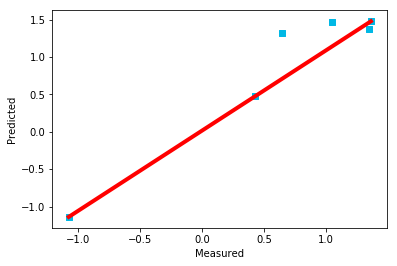

In [163]:
#再看一下回归曲线
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
ax.scatter(y_test3, y_pred3,marker='s',color='#00b8e5')
ax.plot([y_test3.min(), y_test3.max()],[y_pred3.min(), y_pred3.max()],color='red',linestyle='-',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [165]:
#再看一下R方
y_pred33 = y_pred3.tolist()
#print(y_pred1)
y_pred33 = np.array(y_pred33)
#print(y_pred1)
#y_pred1.shape
for i, y_pred33 in enumerate(y_pred33):
    print('Predicted: %s, Target: %s' % (y_pred33, y_test3[i]))
print('R-squared: %.2f' % model3.score(X_test3, y_test3))

Predicted: [1.37490956], Target: [1.34917105]
Predicted: [1.46095492], Target: [1.04666856]
Predicted: [-1.13858278], Target: [-1.07190293]
Predicted: [0.47634446], Target: [0.42954238]
Predicted: [1.47659999], Target: [1.36287326]
Predicted: [1.31899821], Target: [0.64877764]
R-squared: 0.85


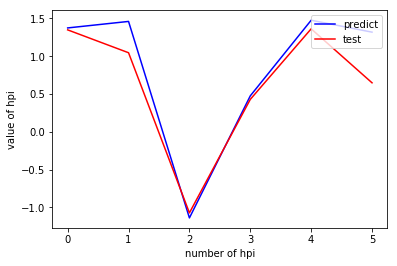

In [166]:
#再看一下ROC曲线
plt.figure()
plt.plot(range(len(y_pred3)),y_pred3,'b',label="predict")
plt.plot(range(len(y_pred3)),y_test3,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("number of hpi")
plt.ylabel('value of hpi')
plt.show()